In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries

In [56]:
import tensorflow.keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Embedding,  LSTM, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import pickle
import os

### Reading File

In [3]:
file = open("/content/Next Word Predictor Dataset.txt", "r")
content = file.read()
content

'I hope this email finds you well\nThank you for your prompt response\nI appreciate your valuable input on this matter\nPlease find attached the document you requested\nI am writing to inform you about the upcoming event\nYour attention to detail is truly commendable\nI wanted to follow up on our recent conversation\nIt was a pleasure meeting you at the conference\nI am reaching out to discuss potential collaboration\nI wanted to express my gratitude for your support\nLet\'s schedule a meeting to go over the project details\nYour insights have been instrumental in our decision-making process\nI look forward to hearing your thoughts on this proposal\nPlease let me know if you require any further clarification\nCongratulations on your recent achievements\nI am thrilled to be a part of this exciting initiative\nYour professionalism is truly inspiring\nThe attached report contains a comprehensive analysis\nI wanted to share some exciting news with you\nI apologize for any inconvenience cau

In [4]:
tk = Tokenizer()
tk.fit_on_texts([content])

In [5]:
len(tk.word_index)

2963

In [6]:
input_sequence =[]
for text in content.split('\n'):
     tokenized_sentence = tk.texts_to_sequences([text])[0]
     for i in range(1, len(tokenized_sentence)):
       input_sequence.append(tokenized_sentence[:i+1])



In [7]:
input_sequence

[[4, 1576],
 [4, 1576, 70],
 [4, 1576, 70, 1978],
 [4, 1576, 70, 1978, 1979],
 [4, 1576, 70, 1978, 1979, 5],
 [4, 1576, 70, 1978, 1979, 5, 119],
 [175, 5],
 [175, 5, 6],
 [175, 5, 6, 7],
 [175, 5, 6, 7, 508],
 [175, 5, 6, 7, 508, 909],
 [4, 80],
 [4, 80, 7],
 [4, 80, 7, 342],
 [4, 80, 7, 342, 319],
 [4, 80, 7, 342, 319, 11],
 [4, 80, 7, 342, 319, 11, 70],
 [4, 80, 7, 342, 319, 11, 70, 387],
 [53, 54],
 [53, 54, 250],
 [53, 54, 250, 2],
 [53, 54, 250, 2, 509],
 [53, 54, 250, 2, 509, 5],
 [53, 54, 250, 2, 509, 5, 1343],
 [4, 29],
 [4, 29, 220],
 [4, 29, 220, 1],
 [4, 29, 220, 1, 559],
 [4, 29, 220, 1, 559, 5],
 [4, 29, 220, 1, 559, 5, 39],
 [4, 29, 220, 1, 559, 5, 39, 2],
 [4, 29, 220, 1, 559, 5, 39, 2, 66],
 [4, 29, 220, 1, 559, 5, 39, 2, 66, 458],
 [7, 150],
 [7, 150, 1],
 [7, 150, 1, 287],
 [7, 150, 1, 287, 20],
 [7, 150, 1, 287, 20, 267],
 [7, 150, 1, 287, 20, 267, 343],
 [4, 97],
 [4, 97, 1],
 [4, 97, 1, 459],
 [4, 97, 1, 459, 160],
 [4, 97, 1, 459, 160, 11],
 [4, 97, 1, 459, 160, 1

In [8]:
max_length = max([len(x) for x in input_sequence])

In [9]:
max_length

21

## Generating Padding

In [10]:
padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length, padding='pre')


#### Creating Input and Output

In [65]:
X = padded_input_sequence[:, :-1]
y = padded_input_sequence[:, -1]

#### Now making OHE of y to make this a classification problem as if we try to make it a regression task than outputs can be 2.1 ,3.5,etc. which can not be matched by our dictionary of tokenized words.

In [66]:
X.shape, y.shape

((45447, 20), (45447,))

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [68]:
max_length

21

In [69]:
model = Sequential([
    Embedding(input_dim=len(tk.word_index) + 1, output_dim=200, input_length=max_length - 1),
    Bidirectional(LSTM(256, return_sequences=True)),
    Dropout(0.2),
    LSTM(256),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(len(tk.word_index) + 1, activation='softmax')
])
model.build((None, max_length-1))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 20, 200)        │       592,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 20, 512)        │       935,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 20, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 256)            │       787,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2964)           │       761,748 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,143,732 (11.99 MB)

 Trainable params: 3,143,732 (11.99 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

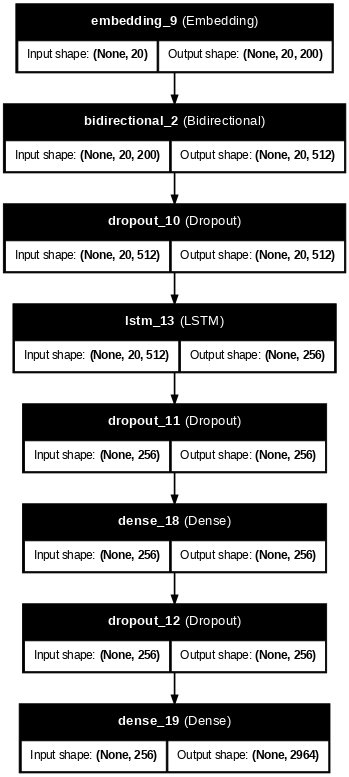

In [71]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, dpi = 60)

In [72]:
history = model.fit(X_train, y_train, batch_size=1000, epochs=25, validation_data=(X_test, y_test), verbose=1)

Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.0373 - loss: 6.7714 - val_accuracy: 0.0694 - val_loss: 5.8187
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.0736 - loss: 5.6072 - val_accuracy: 0.1171 - val_loss: 5.2654
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.1255 - loss: 5.0359 - val_accuracy: 0.1710 - val_loss: 4.8243
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.1774 - loss: 4.5418 - val_accuracy: 0.2216 - val_loss: 4.5164
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.2246 - loss: 4.1369 - val_accuracy: 0.2617 - val_loss: 4.2442
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.2594 - loss: 3.7964 - val_accuracy: 0.2954 - val_loss: 4.0703
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.2898 - loss: 3.5487 - val_accuracy: 0.3130 - val_loss: 3.9745
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.3149 - loss: 3.3221 - val_accuracy: 0.3321 -

In [85]:
text =""
for i in range(2):
  token_text = tk.texts_to_sequences([text])[0]
  padded_token_text = pad_sequences([token_text], maxlen=max_length-1, padding='pre')
  pos = np.argmax(model.predict(padded_token_text))
  for word, index in tk.word_index.items():
    if index == pos:
      text += ' ' + word
text

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


' share some'

In [ ]:
|